# Getting used to markov chains stuff

In [15]:
import numpy as np 
import pandas as pd
from scipy.stats import binned_statistic_2d
from itertools import product

In [16]:
#Pass matrix
A = np.matrix([[0.25, 0.20, 0.1], [0.1, 0.25, 0.2],[0.1, 0.1, 0.25]])
#Goal vector
g = np.transpose(np.matrix([0.05, 0.15, 0.05]))

In [17]:
xT1 = np.linalg.solve(np.identity(3) - A,g)

print('Expected Threat')
print('Central, Box, Wing')
print(np.transpose(xT1))

Expected Threat
Central, Box, Wing
[[0.14991763 0.25205931 0.12026359]]


# Calcuting xT position based:

In [18]:
#importing necessary libraries
import pandas as pd
import numpy as np
import json
# plotting
import matplotlib.pyplot as plt
#opening data
import os
import pathlib
import warnings
#used for plots
from mplsoccer import Pitch
from scipy.stats import binned_statistic_2d

pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')

In [19]:
df1 = pd.read_csv("../datasets/Universitatea_Cluj_2024_2025_events.csv")
df = df1[df1["team.id"]!=60374]

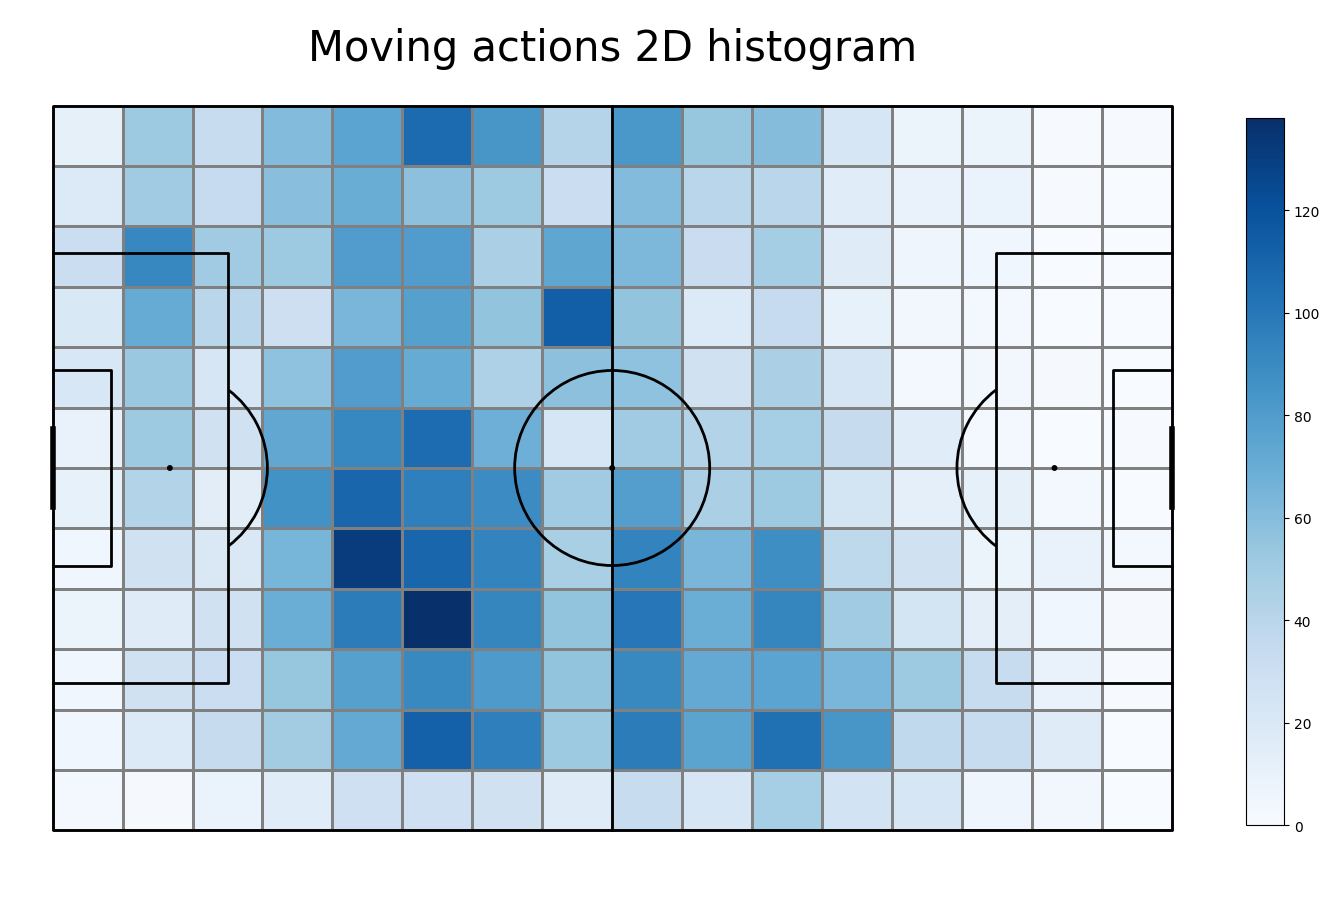

In [20]:
# 1. FILTERING AND CLEANING
# First, filter for only the specific pass types you are interested in
pass_types = ['short_or_medium_pass', 'long_pass', 'head_pass', 'smart_pass', 'cross']
move_df = df.loc[
    (df['type.secondary'].apply(lambda x: any(item in x for item in pass_types))) &
    (df['pass.accurate'] == True)
]

# 2. FILTERING THE COORDINATES
# This line is correct and should remain to filter for valid end locations
move_df = move_df.loc[(((move_df["pass.endLocation.x"] != 0) & (move_df["pass.endLocation.y"] != 68)) & ((move_df["pass.endLocation.x"] != 105) & (move_df["pass.endLocation.y"] != 0)))]

# 3. CREATE THE HEATMAP
# The rest of your code is correct and will now create a heatmap for accurate passes
pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder=2)
move = pitch.bin_statistic(move_df['location.x'], move_df['location.y'], statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])

ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)

fig.suptitle('Moving actions 2D histogram', fontsize=30)
plt.show()

move_count = move["statistic"]

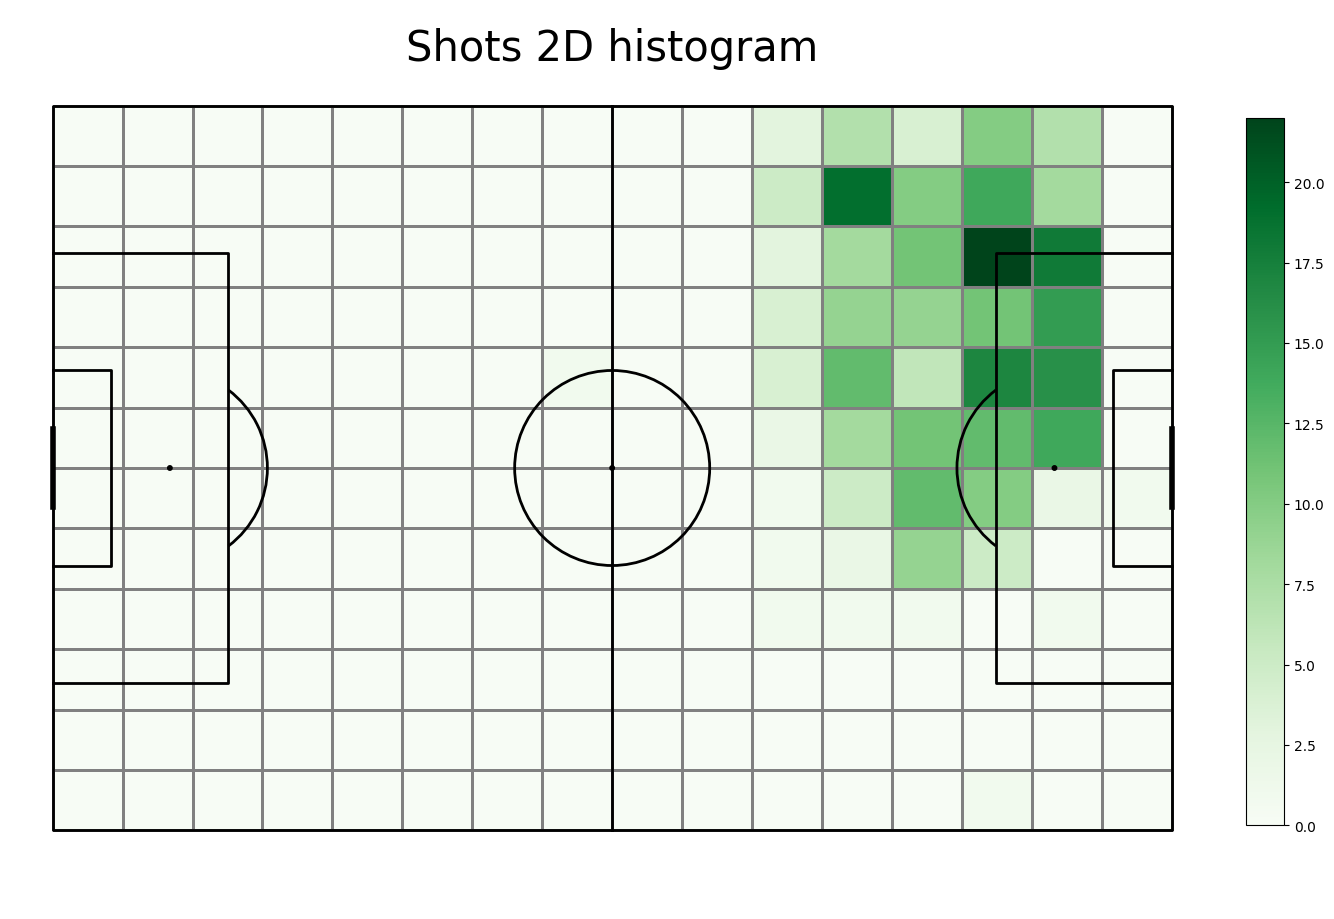

In [21]:
#get shot df
shot_df = df.loc[df['type.primary'] == "shot"]

#create 2D histogram of these
shot = pitch.bin_statistic(shot_df["location.x"], shot_df["location.y"], statistic='count', bins=(16, 12), normalize=False)

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shots 2D histogram', fontsize = 30)
plt.show()

shot_count = shot["statistic"]

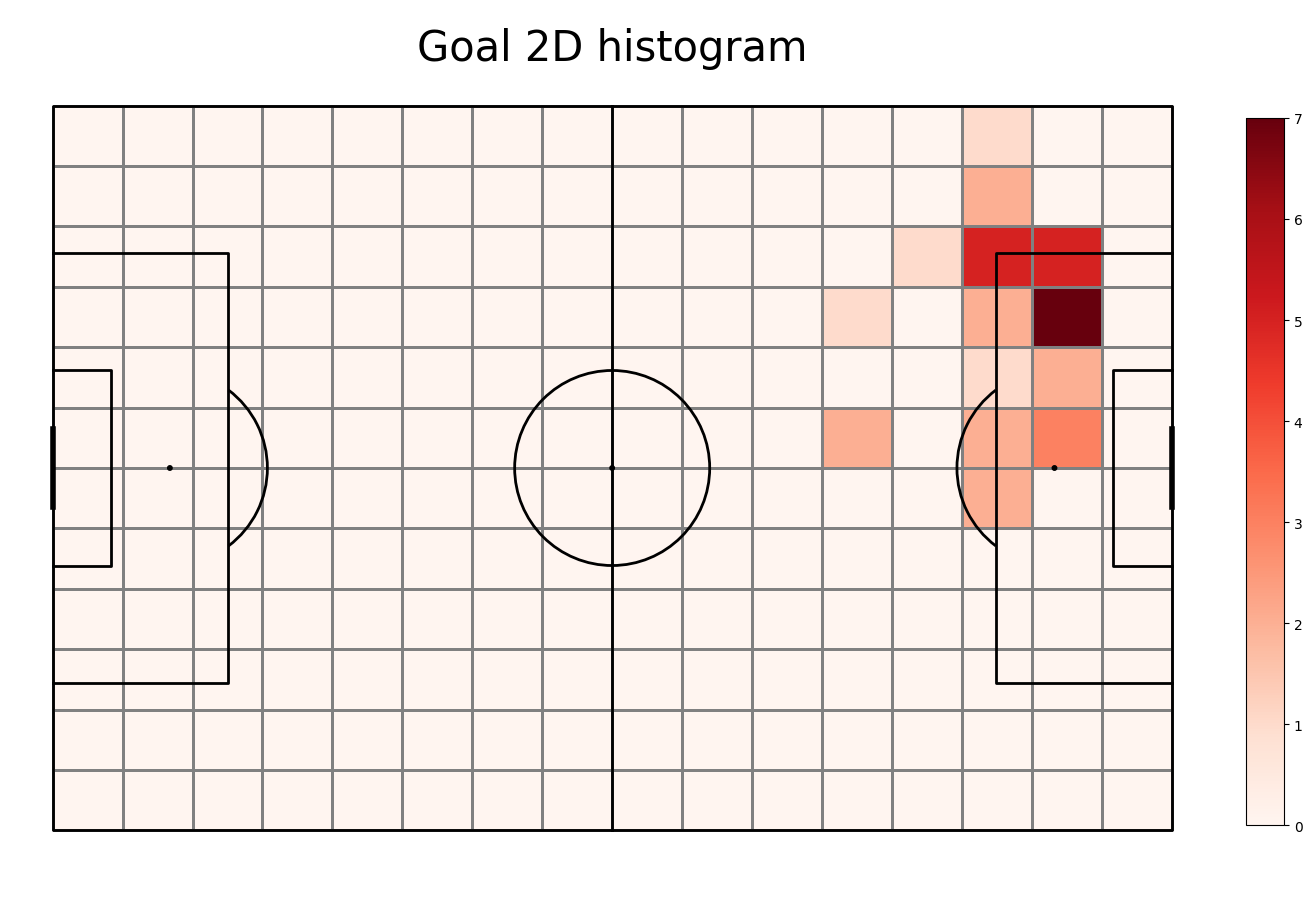

In [22]:
#get goal df
goal_df = shot_df.loc[shot_df['shot.isGoal'] == True]
goal = pitch.bin_statistic(goal_df["location.x"], goal_df["location.y"], statistic='count', bins=(16, 12), normalize=False)
goal_count = goal["statistic"]

fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal 2D histogram', fontsize = 30)
plt.show()

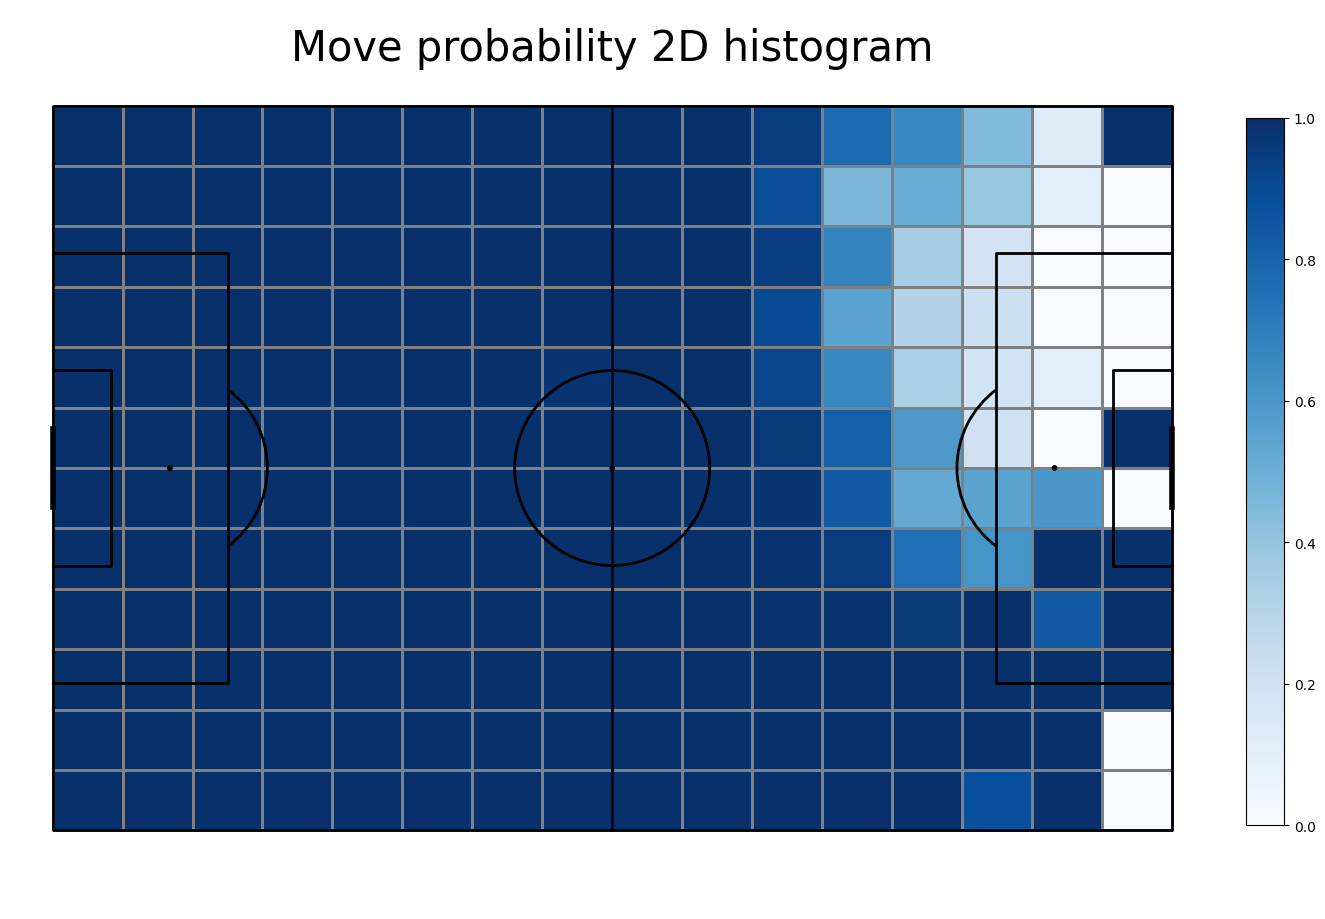

In [23]:
# The corrected calculation that handles division by zero
total_actions = move_count + shot_count
move_probability = np.nan_to_num(move_count / total_actions)

#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
move["statistic"] = move_probability
pcm  = pitch.heatmap(move, cmap='Blues', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Move probability 2D histogram', fontsize = 30)
plt.show()

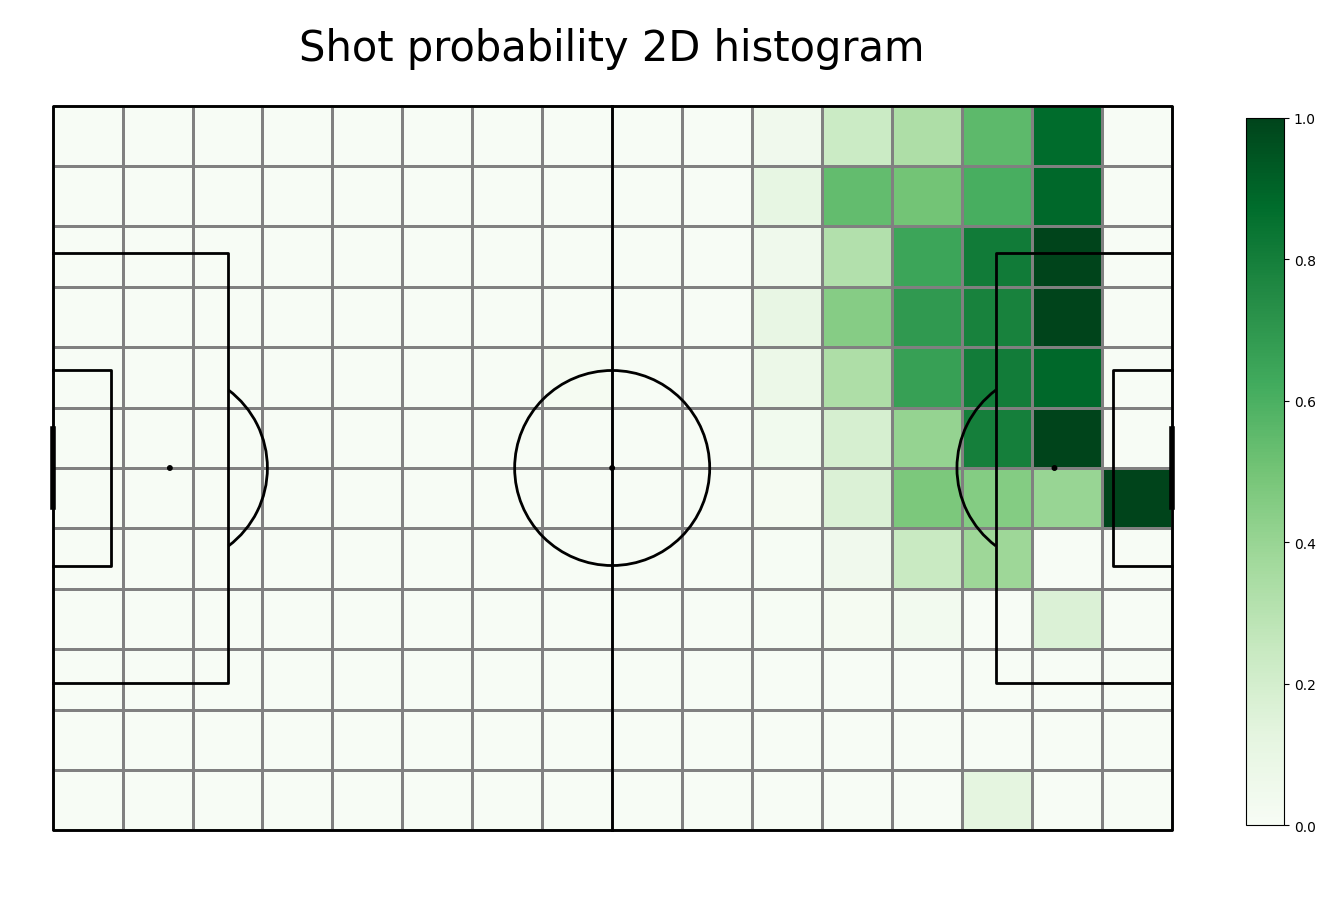

In [24]:
# The corrected calculation that handles division by zero
total_actions = move_count + shot_count
shot_probability = np.nan_to_num(shot_count / total_actions)

# The rest of your plotting code is correct
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
shot["statistic"] = shot_probability
pcm  = pitch.heatmap(shot, cmap='Greens', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Shot probability 2D histogram', fontsize = 30)
plt.show()

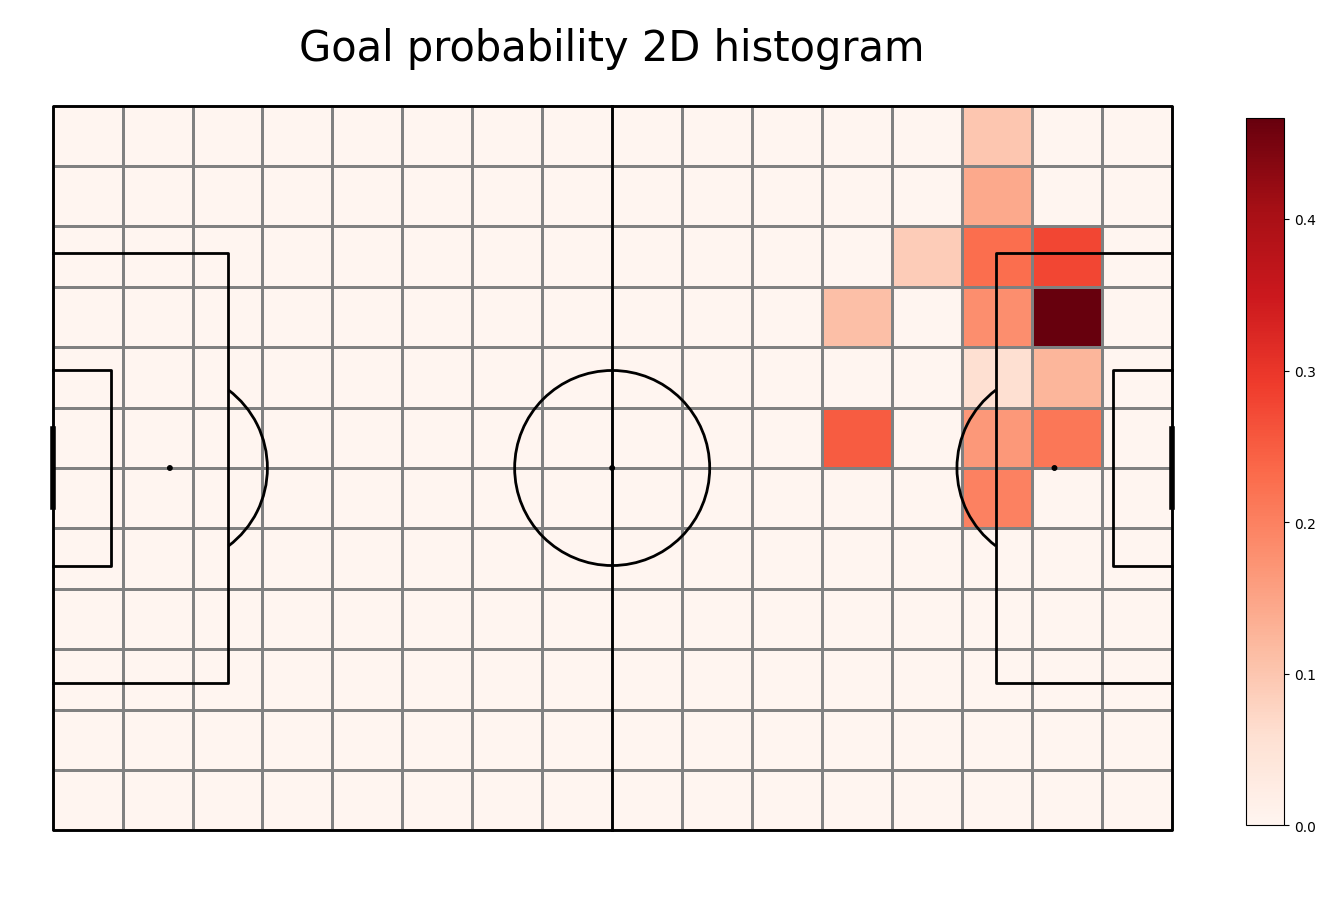

In [25]:
# The corrected calculation for goal probability
# This safely handles zones with zero shots, preventing NaN values.
goal_probability = np.divide(goal_count, shot_count, out=np.zeros_like(goal_count), where=shot_count != 0)

#plotting it
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
goal["statistic"] = goal_probability
pcm  = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Goal probability 2D histogram', fontsize = 30)
plt.show()

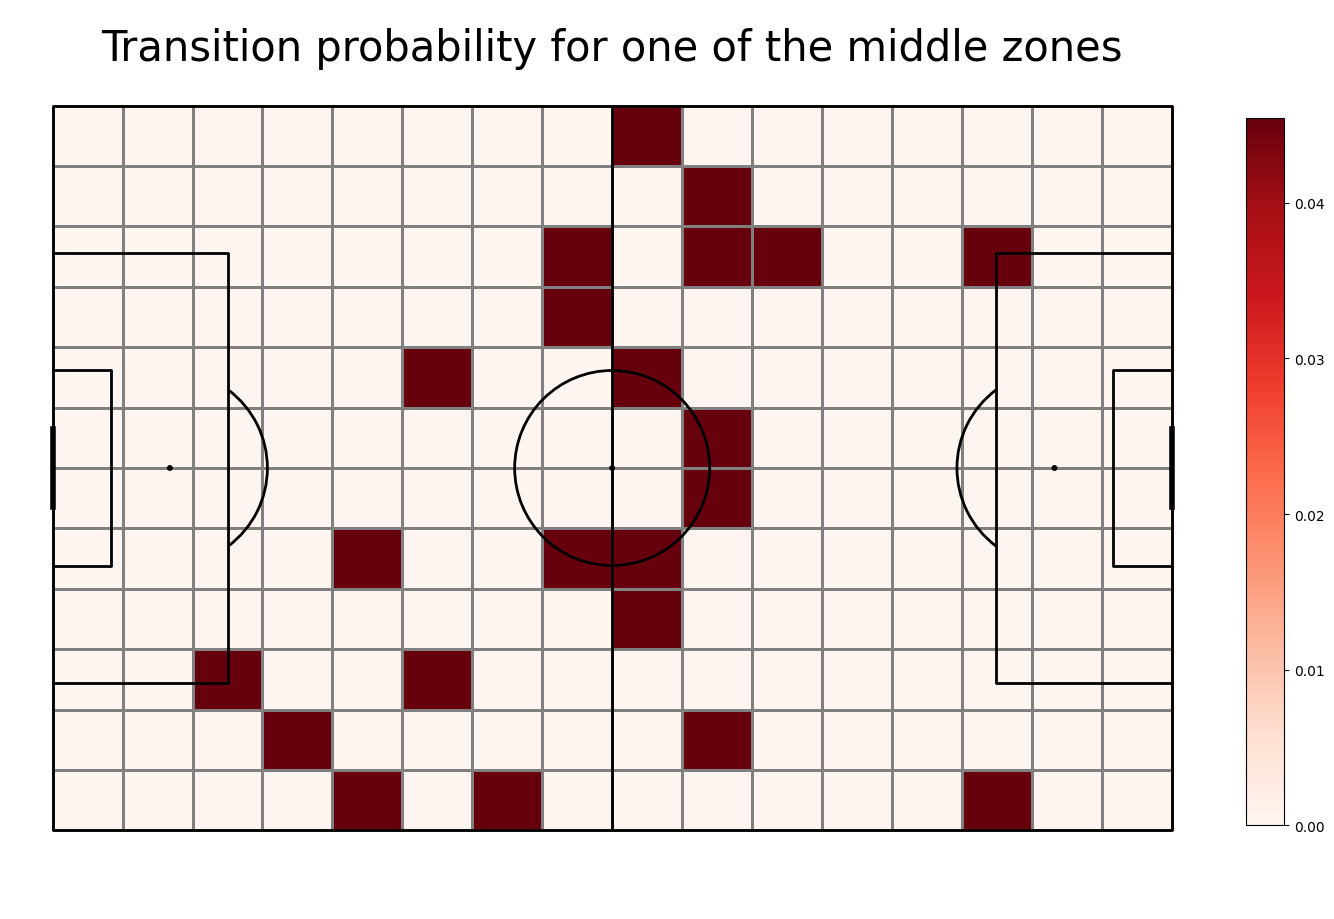

In [26]:

# Assuming your move_df and a pitch object are already created

# move start index
move_df["start_sector"] = move_df.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row['location.x']), np.ravel(row['location.y']),
                                                                                          values="None", statistic="count",
                                                                                          bins=(16, 12), range=[[0, 105], [0, 68]],
                                                                                          expand_binnumbers=True)[3]]), axis=1)

# move end index
move_df["end_sector"] = move_df.apply(lambda row: tuple([i[0] for i in binned_statistic_2d(np.ravel(row['pass.endLocation.x']), np.ravel(row['pass.endLocation.y']),
                                                                                        values="None", statistic="count",
                                                                                        bins=(16, 12), range=[[0, 105], [0, 68]],
                                                                                        expand_binnumbers=True)[3]]), axis=1)

# ADD THIS FILTER TO REMOVE INVALID SECTORS
move_df = move_df.loc[
    ((move_df["start_sector"].apply(lambda x: x[0] <= 16 and x[1] <= 12)) &
    (move_df["end_sector"].apply(lambda x: x[0] <= 16 and x[1] <= 12)))
]


#df with summed events from each index
df_count_starts = move_df.groupby(["start_sector"])["matchId"].count().reset_index()
df_count_starts.rename(columns = {'matchId':'count_starts'}, inplace=True)

transition_matrices = []
for i, row in df_count_starts.iterrows():
    start_sector = row['start_sector']
    count_starts = row['count_starts']
    #get all events that started in this sector
    this_sector = move_df.loc[move_df["start_sector"] == start_sector]
    df_count_ends = this_sector.groupby(["end_sector"])["matchId"].count().reset_index()
    df_count_ends.rename(columns = {'matchId':'count_ends'}, inplace=True)
    T_matrix = np.zeros((12, 16))
    for j, row2 in df_count_ends.iterrows():
        end_sector = row2["end_sector"]
        value = row2["count_ends"]
        T_matrix[end_sector[1] - 1][end_sector[0] - 1] = value
    T_matrix = T_matrix / count_starts
    transition_matrices.append(T_matrix)

# This assumes the 'pitch' and 'goal' objects have been created earlier
pitch = Pitch(line_color='black', pitch_type='custom', pitch_length=105, pitch_width=68, line_zorder=2)
goal = pitch.bin_statistic(move_df['location.x'], move_df['location.y'], statistic='count', bins=(16, 12), normalize=False)

#let's plot it for the zone [1,1] - left down corner
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

#Change the index here to change the zone.
goal["statistic"] = transition_matrices[90]
pcm = pitch.heatmap(goal, cmap='Reds', edgecolor='grey', ax=ax['pitch'])
#legend to our plot
ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
fig.suptitle('Transition probability for one of the middle zones', fontsize = 30)
plt.show()

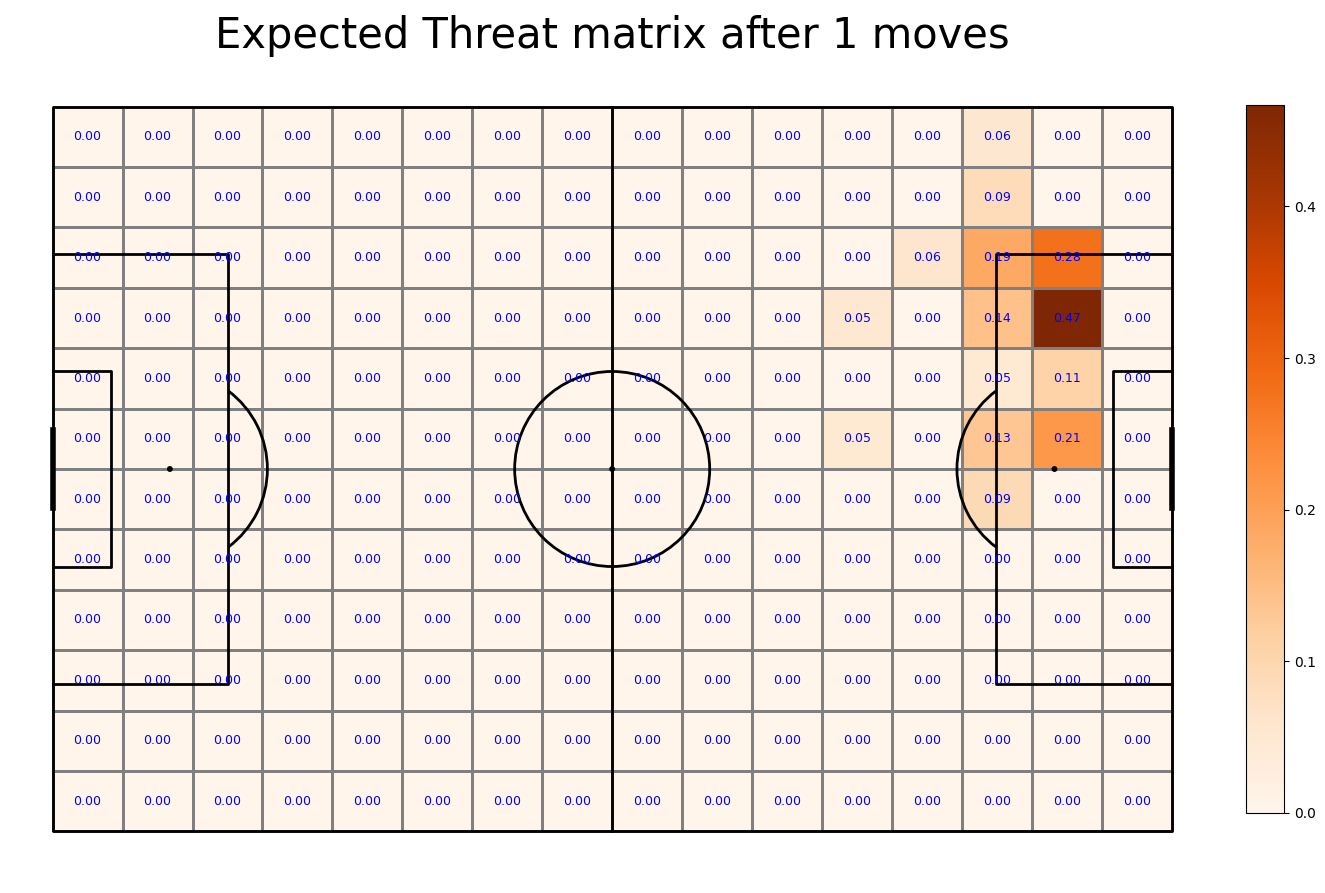

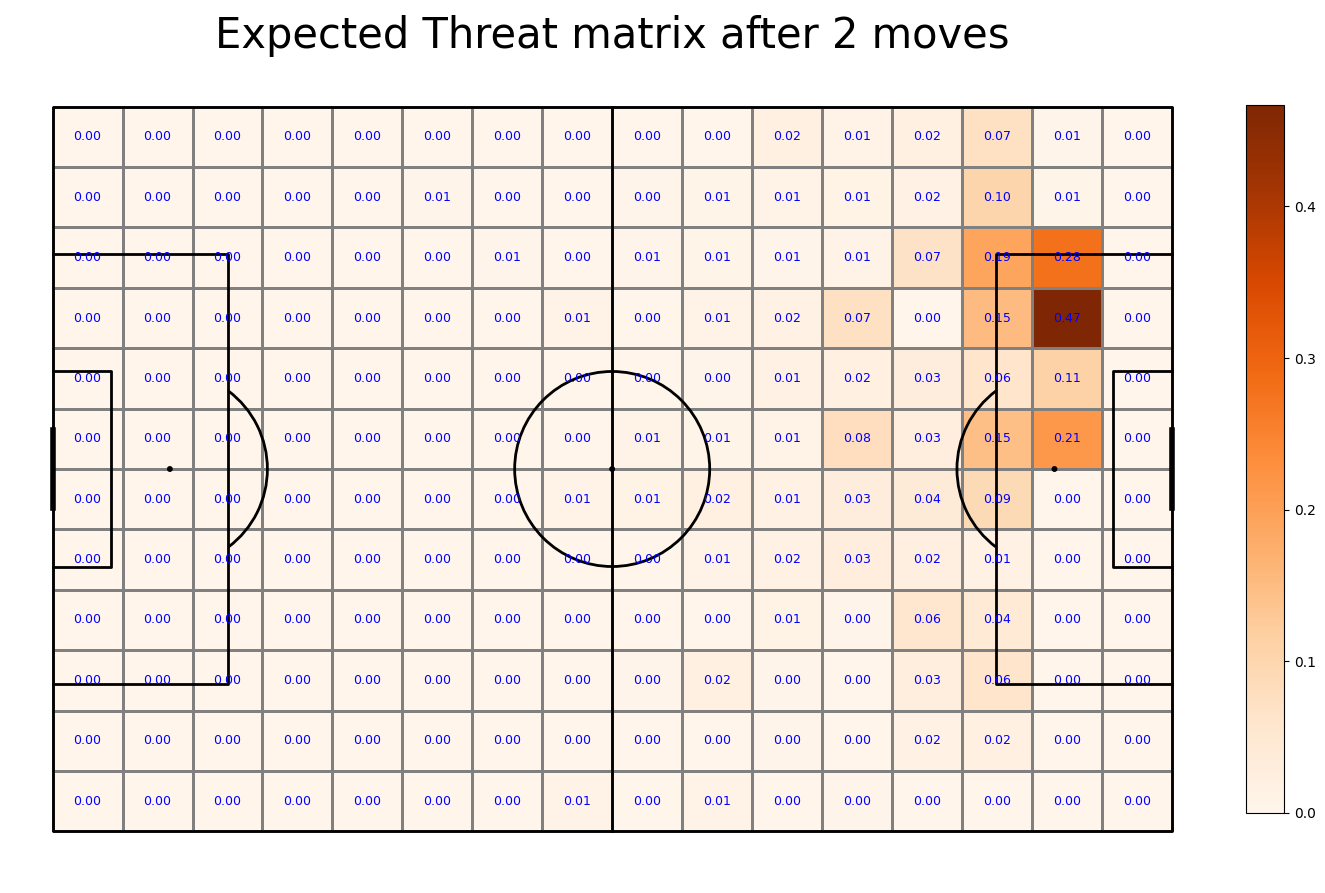

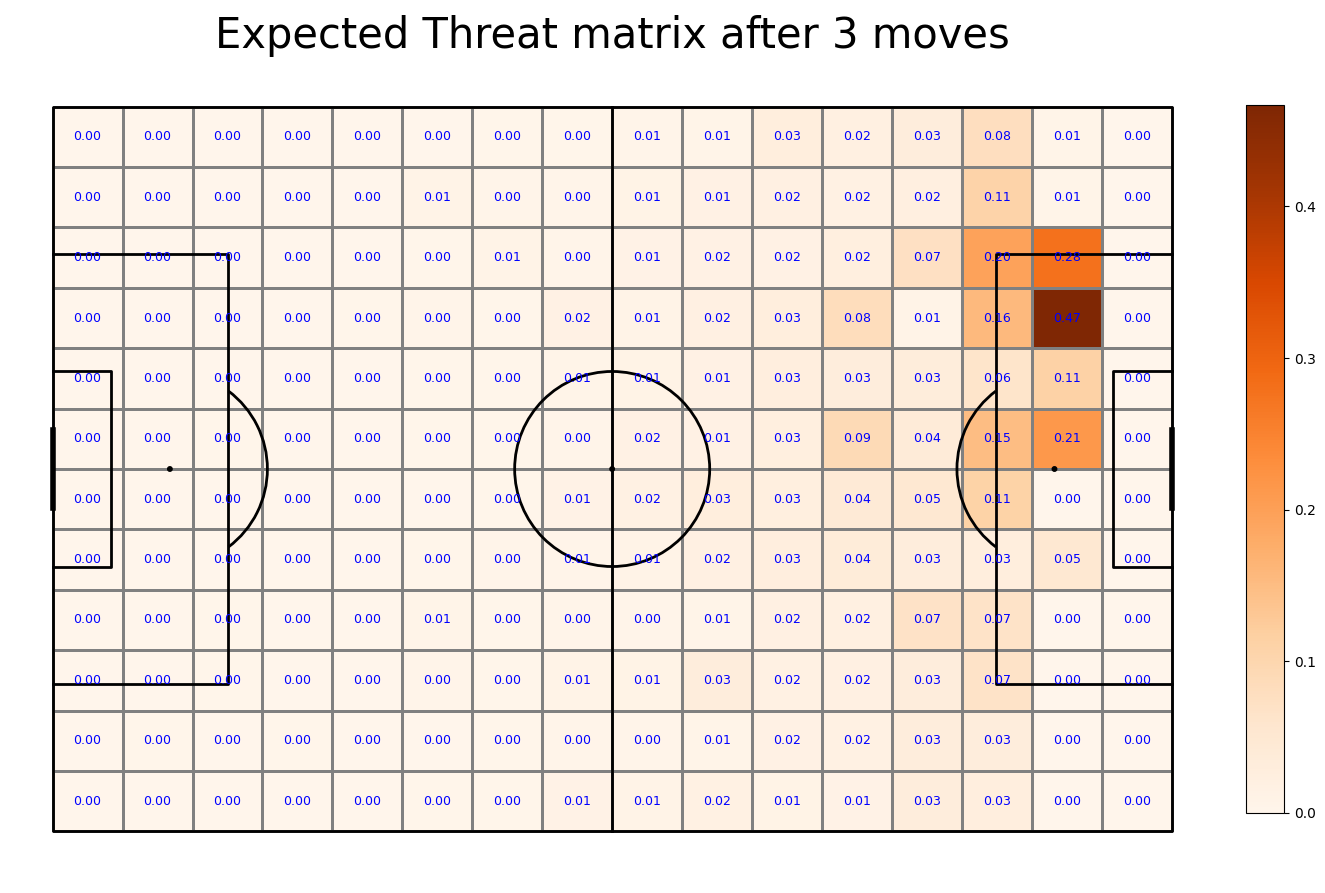

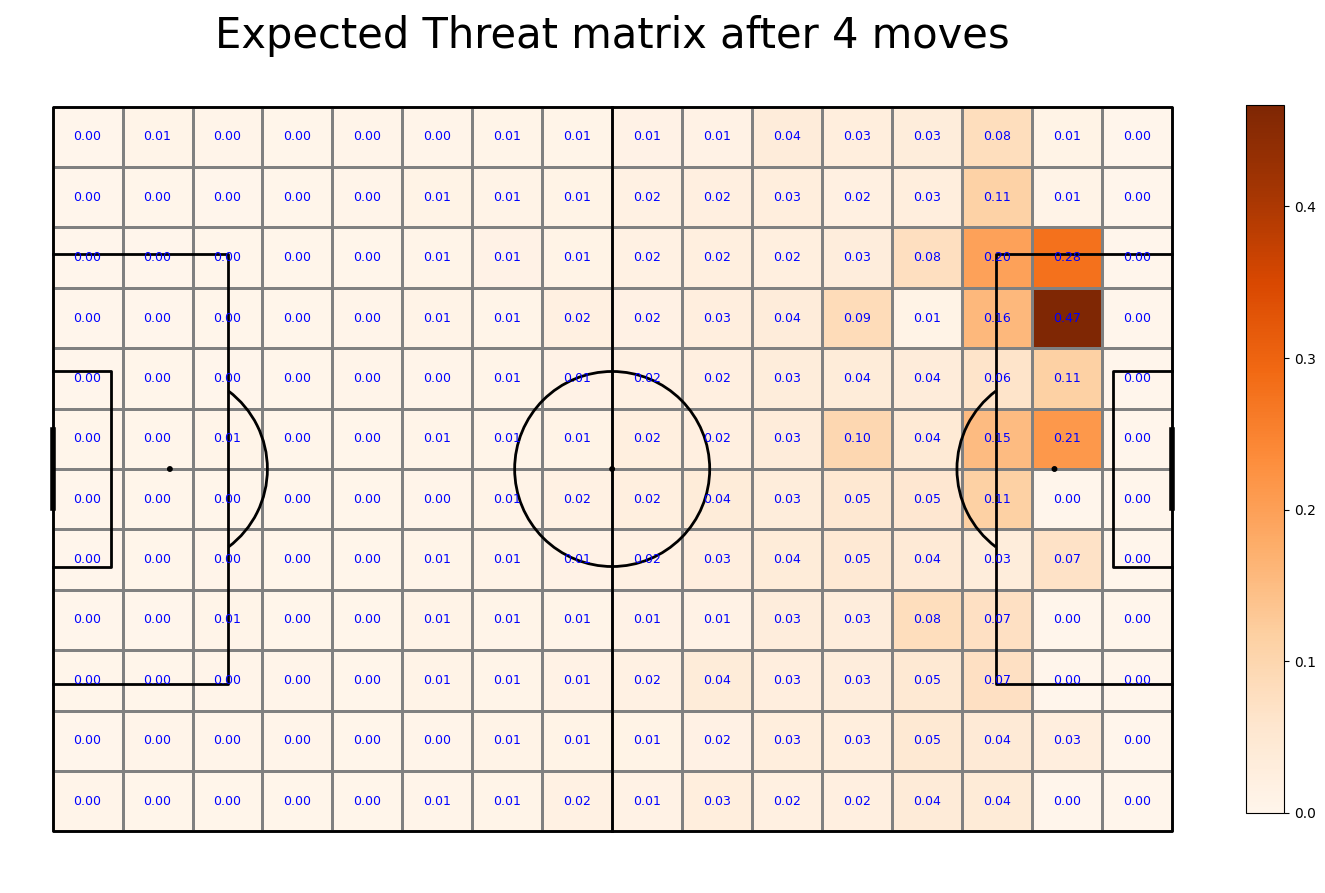

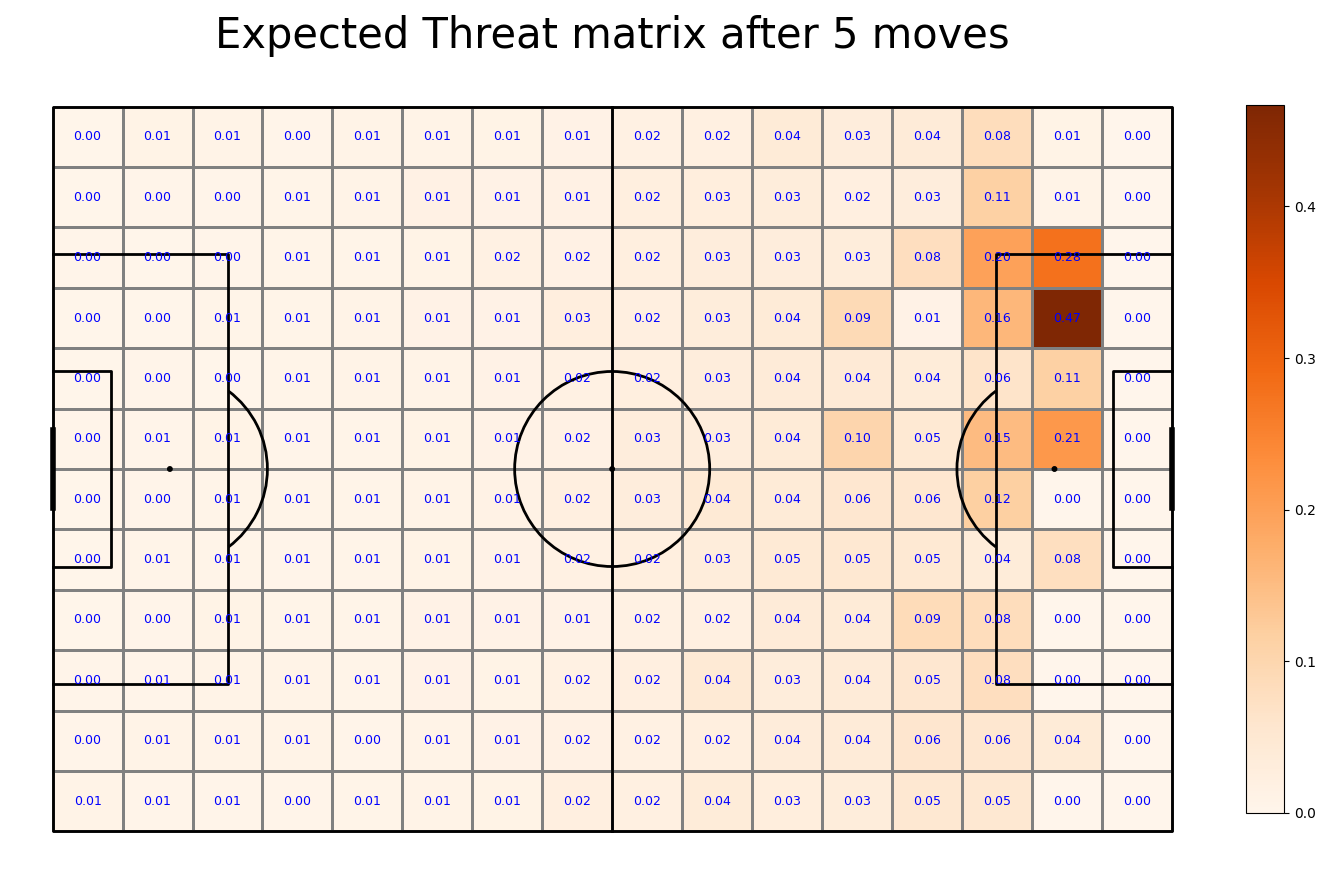

In [27]:

# Step 1: Create a dictionary for quick lookup
transition_matrices_dict = {
    row['start_sector']: transition_matrices[i]
    for i, row in df_count_starts.iterrows()
}

# Step 2: Create a full list of all 192 matrices
all_sectors = product(range(1, 17), range(1, 13))
transition_matrices_full = []
for sector in all_sectors:
    # If the sector is in our dictionary, use its matrix
    if sector in transition_matrices_dict:
        transition_matrices_full.append(transition_matrices_dict[sector])
    # If not, add a zero-filled matrix
    else:
        transition_matrices_full.append(np.zeros((12, 16)))

# Step 3: Convert the full list to a numpy array for calculation
transition_matrices_array = np.array(transition_matrices_full)
# The rest of your code from here is correct.
xT = np.zeros((12, 16))
for i in range(5):
    shoot_expected_payoff = goal_probability * shot_probability
    move_expected_payoff = move_probability * (np.sum(np.sum(transition_matrices_array * xT, axis=2), axis=1).reshape(16, 12).T)
    xT = shoot_expected_payoff + move_expected_payoff

    #let's plot it!
    fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                         endnote_height=0.01, title_space=0, endnote_space=0)

    # This assumes a 'goal' object for plotting. You may need to create it.
    goal = pitch.bin_statistic(move_df['location.x'], move_df['location.y'], statistic='count', bins=(16, 12), normalize=False)
    goal["statistic"] = xT

    pcm = pitch.heatmap(goal, cmap='Oranges', edgecolor='grey', ax=ax['pitch'])
    labels = pitch.label_heatmap(goal, color='blue', fontsize=9,
                                 ax=ax['pitch'], ha='center', va='center', str_format="{0:,.2f}", zorder=3)
    #legend to our plot
    ax_cbar = fig.add_axes((1, 0.093, 0.03, 0.786))
    cbar = plt.colorbar(pcm, cax=ax_cbar)
    txt = 'Expected Threat matrix after ' + str(i + 1) + ' moves'
    fig.suptitle(txt, fontsize = 30)
    plt.show()